**Part 2**

In [1]:
install.packages("igraph") 
install.packages("Matrix") 
install.packages("pracma") 
install.packages("resample") 
library('igraph')
library('Matrix')
library('pracma')
library('resample')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘pracma’


The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu




In [0]:
# Helper Functions
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

get_gcc = function(g){
    
    if (!is.connected(g)) {

        components = clusters(g)
        ix = which.max(components$csize)
        gcc = induced.subgraph(g, which(components$membership == ix))
        return(gcc)
    }
    else
        return(g)
}

plot_graph = function (g, steps, times, deg_dist=FALSE){
    gcc = get_gcc(g)
    dist = shortest.paths(gcc, v=V(gcc), to=V(gcc))

    tm = create_transition_matrix(gcc)
    stm = matrix(rep(0, steps*times), nrow=times, ncol=steps)
    dega = array(0, times)

    for(t in 1:times){
        start = sample(1:vcount(gcc), 1)
        for(s in 1:steps){
            end = random_walk(gcc, s, start, tm)
            stm[t, s] = dist[start, end]
        }
        dega[t] = degree(gcc, end)
    }
    
    means = colMeans(stm)
    vars = colVars(stm)
    
    #(b)
    plot(means, typ='o', main = "<s(t)> v.s. t", xlab = "Number of Steps", ylab = "Average Distance of Walker")
    plot(vars, typ='o', main = "Variance v.s. t", xlab = "Number of Steps", ylab = "Variance of Walker")

    #(c)
    if (deg_dist == TRUE){
        deg = degree(g, V(g))
        hist(deg, main = "Degree distribution of original graph", xlab = "Degree", freq = FALSE, breaks = max(deg) - min(deg))
        hist(dega, main = "Degree distribution of End-Node of Random Walk", xlab = "Degree", freq = FALSE, breaks = max(dega) - min(dega))
    }
    
}

**Q1**

In [7]:
# (a)
g1 = random.graph.game(1000, p=0.01, directed = F)
is.connected(g1)

[1] TRUE

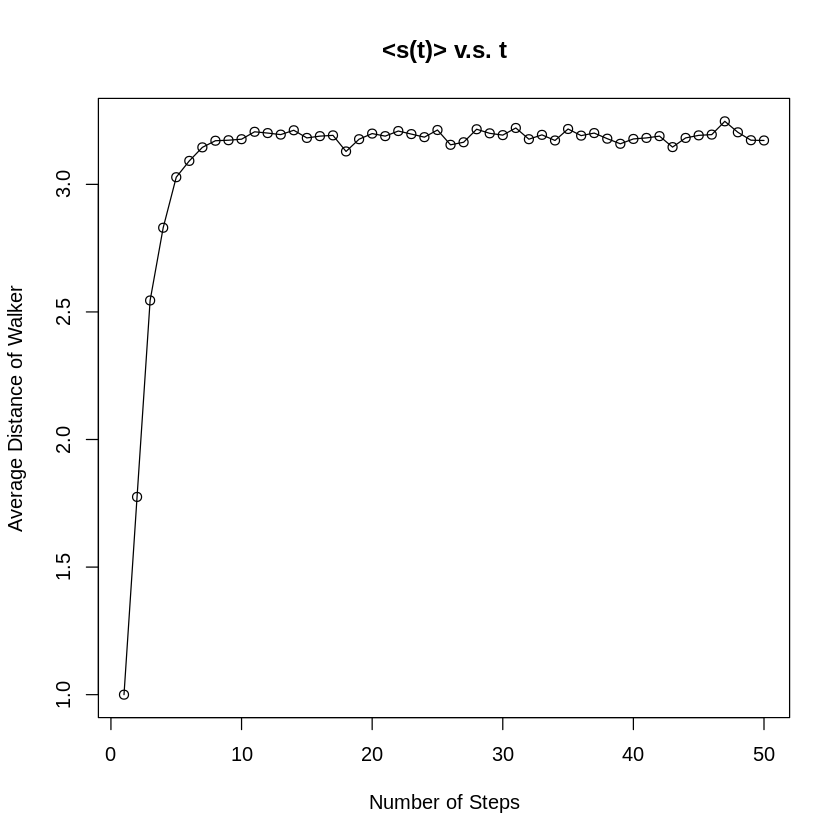

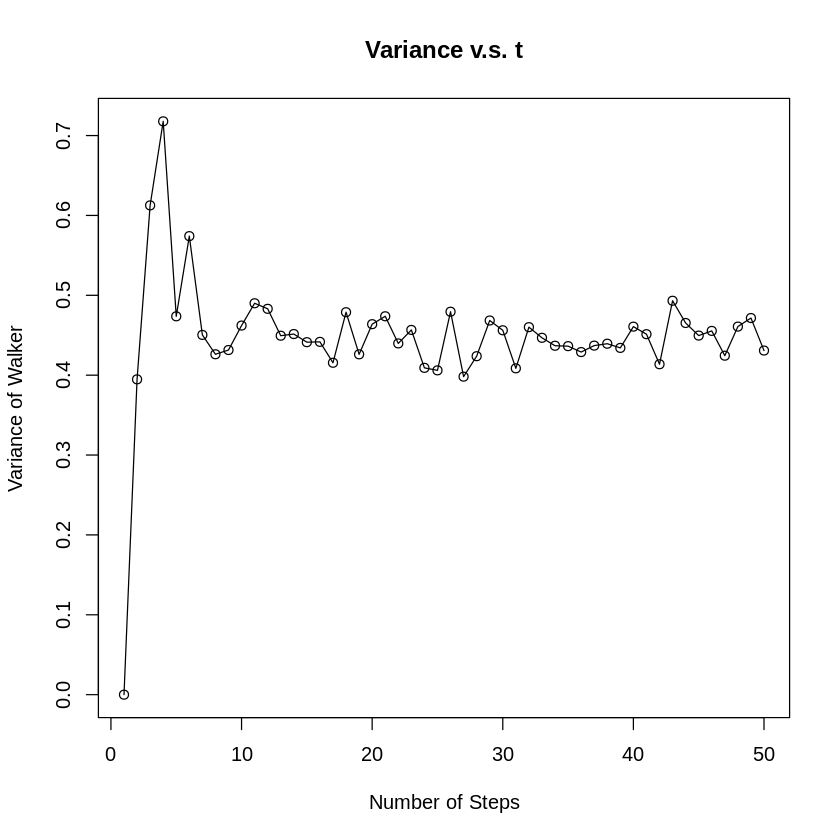

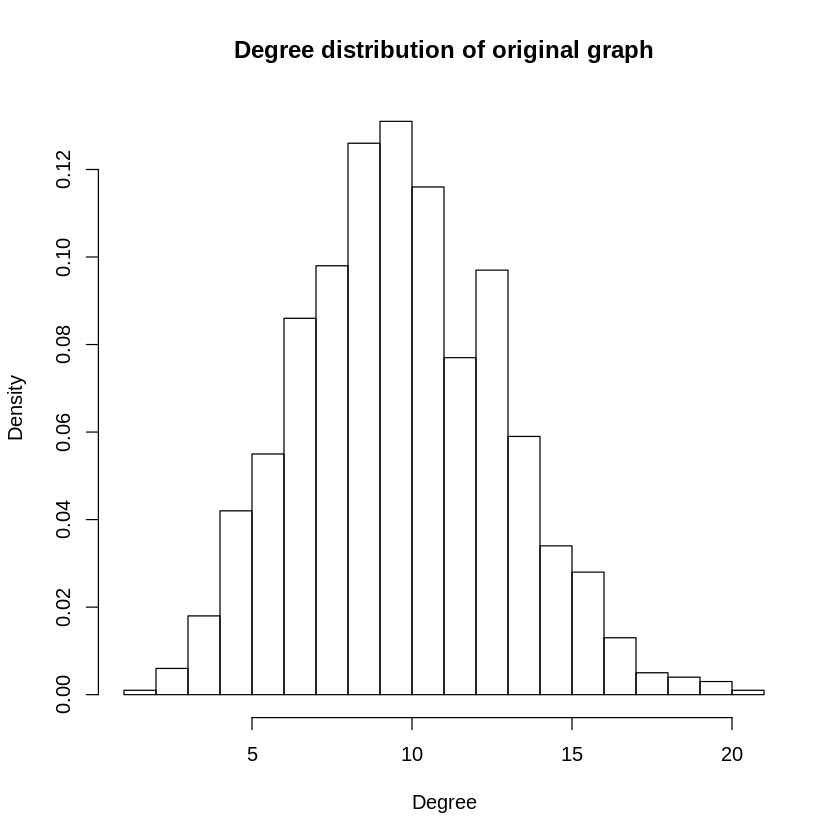

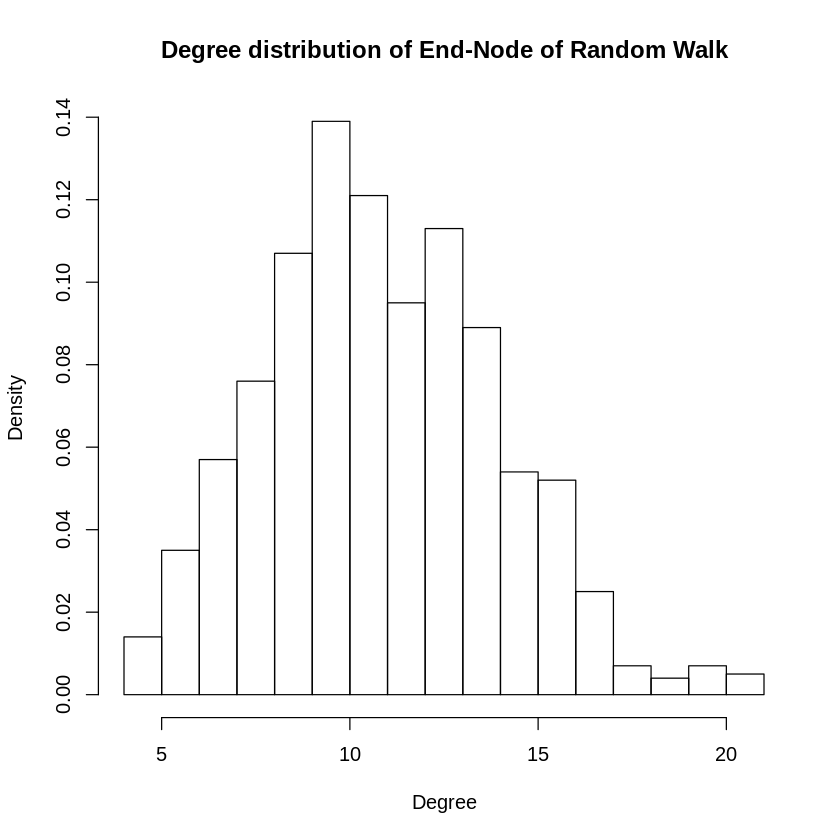

In [8]:
# (b), (C)

plot_graph(g1, 50, 1000, TRUE)


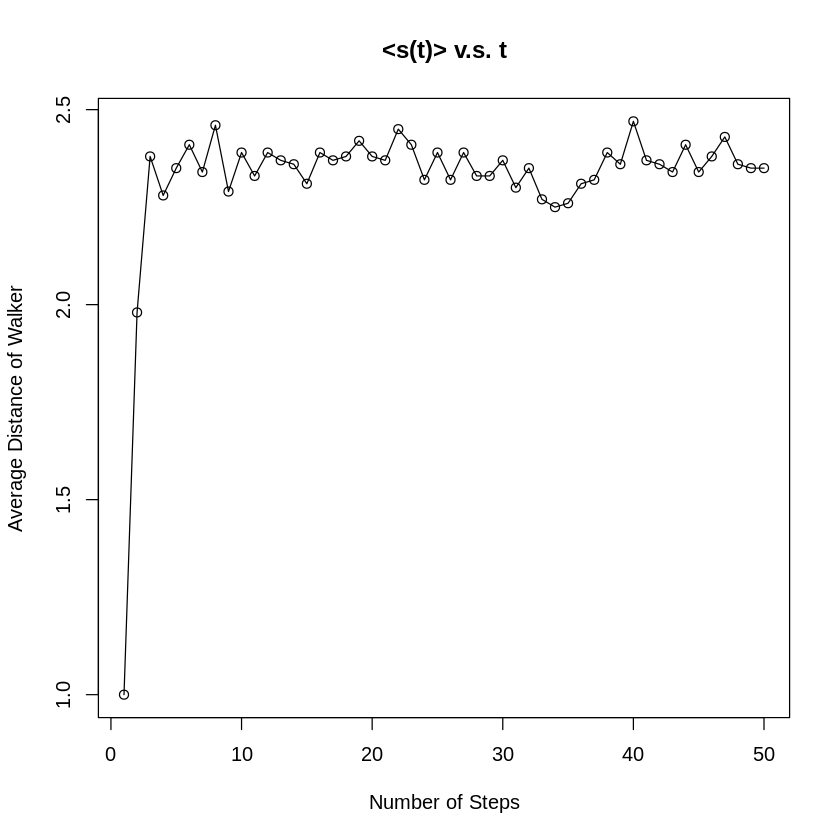

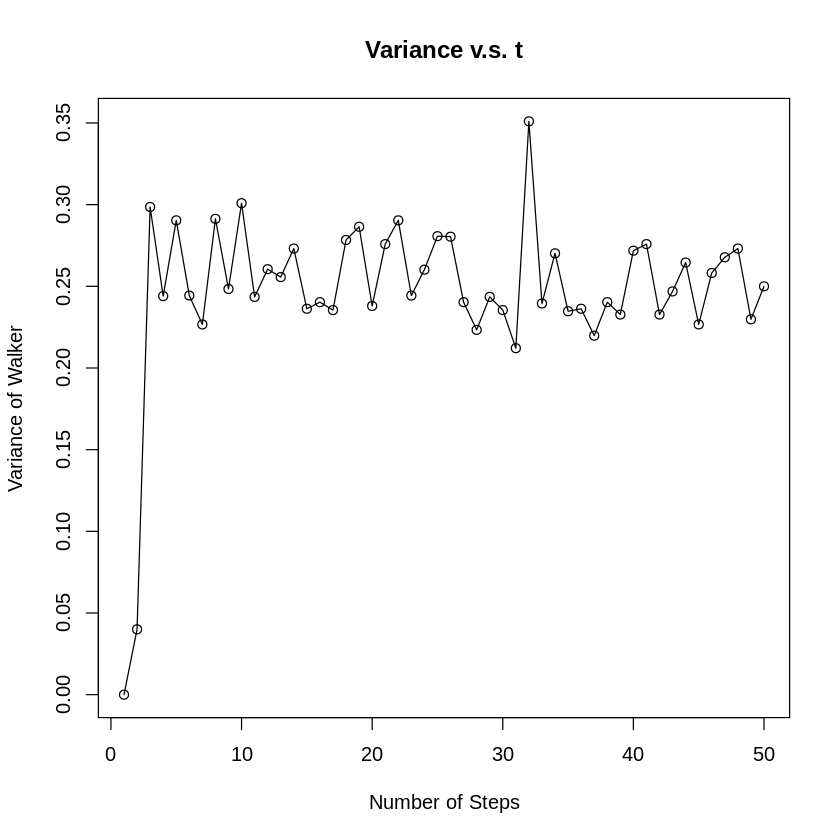

In [23]:
# (d)
g2 = random.graph.game(10000, p=0.01, directed = F)
plot_graph(g2, 50, 100, FALSE)


In [25]:
components = clusters(g2)
ix = which.max(components$csize)
gcc = induced.subgraph(g2, which(components$membership == ix))
diameter = diameter(gcc, directed=FALSE)
print(paste("Diameter of GCC: ", diameter))

[1] "Diameter of GCC:  3"


**Q2**

In [9]:
# (a)
g3 = barabasi.game(n = 1000, m = 1, directed = FALSE)
is.connected(g3)

[1] TRUE

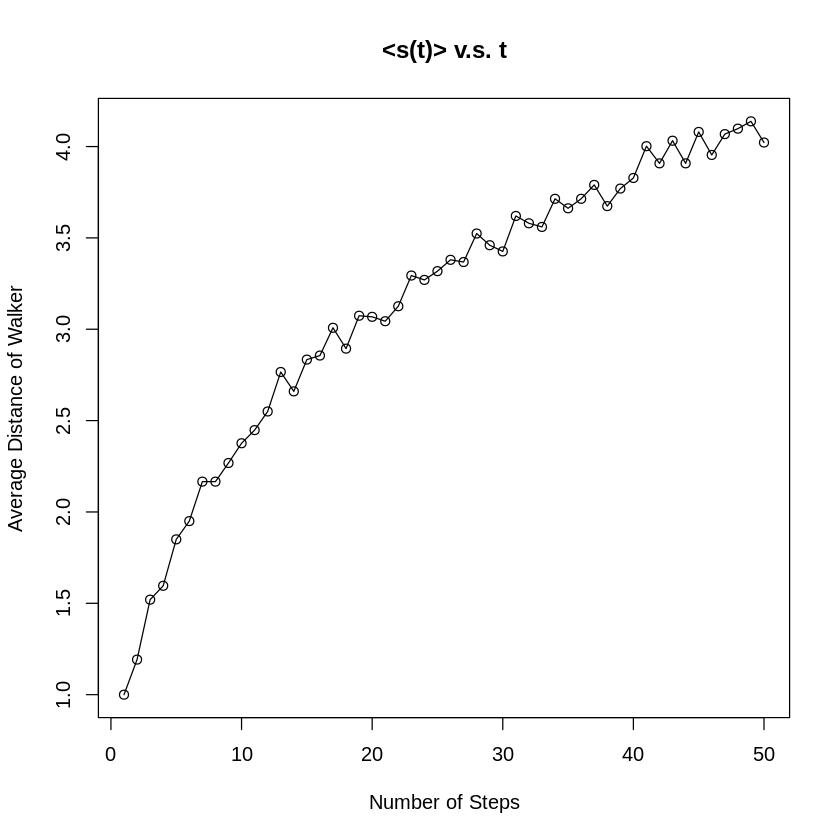

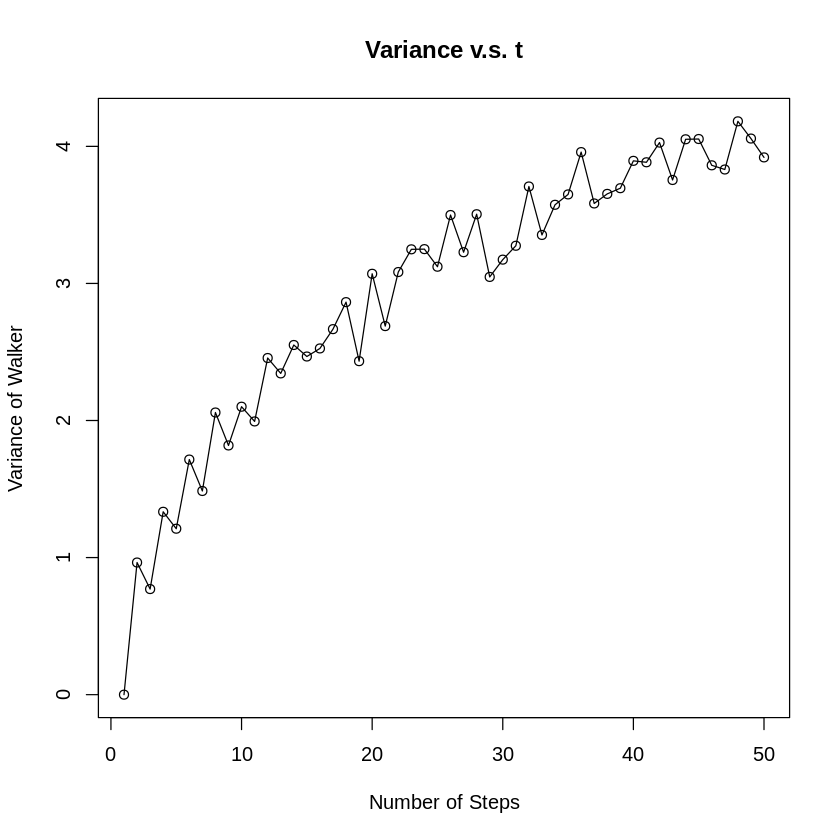

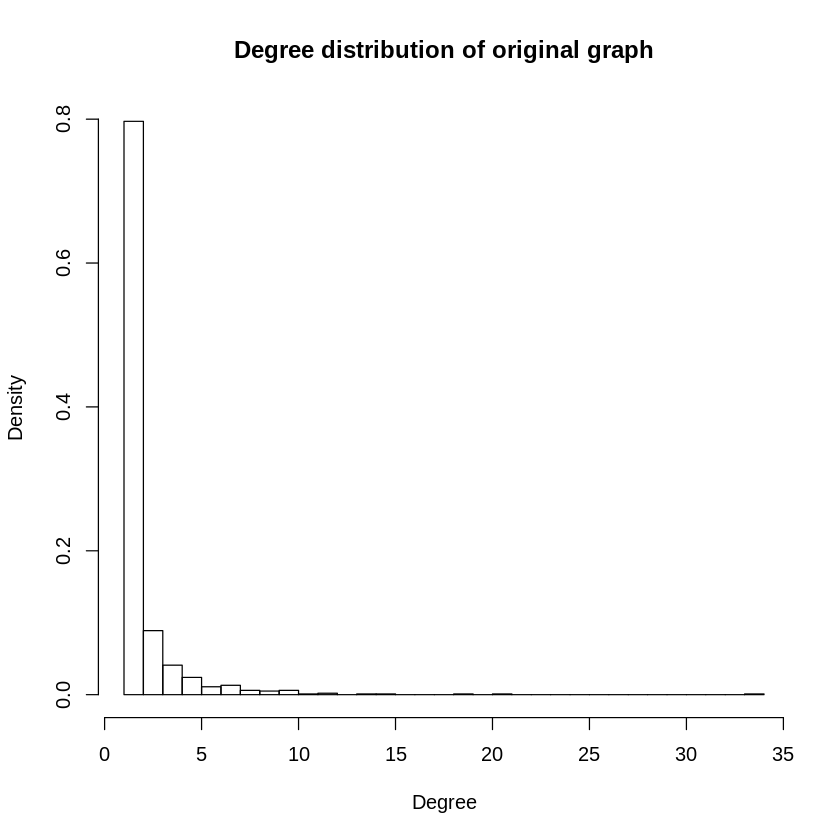

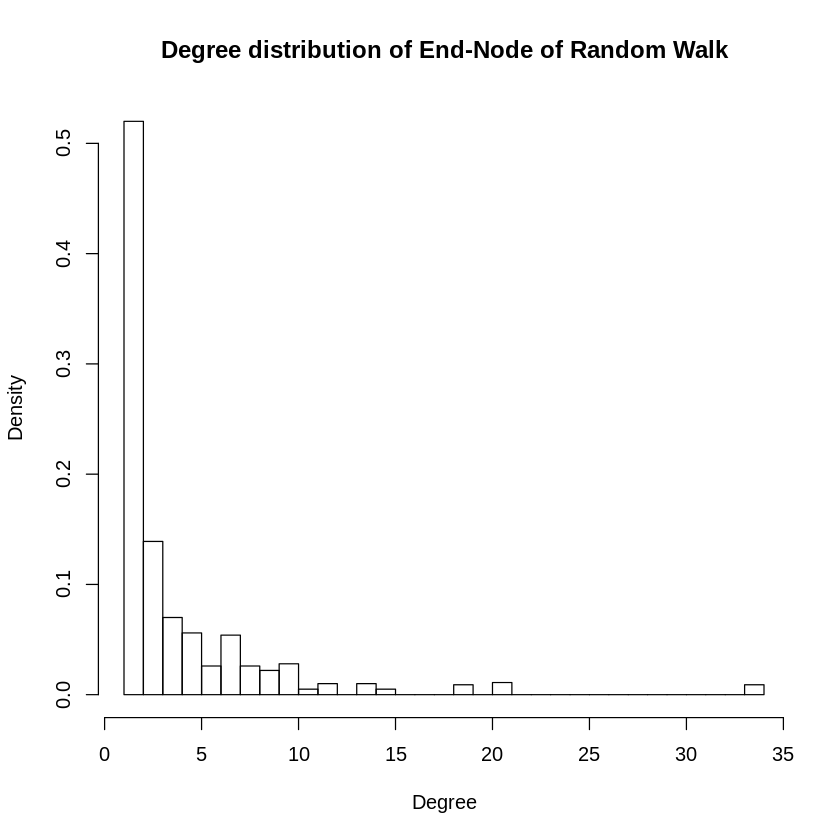

In [10]:
# (b), (C)

plot_graph(g3, 50, 1000, TRUE)

In [0]:
# (d)
g4 = barabasi.game(n = 100, m = 1, directed = FALSE)
# plot_graph(g4, 50, 100, FALSE)

g5 = barabasi.game(n = 10000, m = 1, directed = FALSE)
# plot_graph(g5, 50, 10000, FALSE)

In [27]:
components = clusters(g4)
ix = which.max(components$csize)
gcc = induced.subgraph(g4, which(components$membership == ix))
diameter = diameter(gcc, directed=FALSE)
print(paste("Diameter of GCC: ", diameter))

[1] "Diameter of GCC:  12"


In [28]:
components = clusters(g5)
ix = which.max(components$csize)
gcc = induced.subgraph(g5, which(components$membership == ix))
diameter = diameter(gcc, directed=FALSE)
print(paste("Diameter of GCC: ", diameter))

[1] "Diameter of GCC:  28"


**Q3**

In [0]:
# Helper Functions

new_random_walk = function (g, num_steps, start_node, tele, tele_pmf){
    transition_matrix = create_transition_matrix(g)
        
    v = start_node
    visited = array(0, num_steps)
    for(i in 1:num_steps){
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF*(1-tele) + tele_pmf*tele)
        visited[i] = v
    }
    
    return(visited)
}


plot_prob = function (g, steps, times, tele=0, tele_pmf=0){

    in_deg = degree(g, V(g), c("in"))
    node_visited = array(0, vcount(g))

    for(t in 1:times){
        start = sample(1:vcount(g), 1)
        visited = new_random_walk(g, steps, start, tele, tele_pmf)
    
        temp = array(0, vcount(g))
        temp[visited] = 1
        node_visited = node_visited + temp

    }
    
    node_prob = node_visited/sum(node_visited)
    deg_prob = node_visited/times
    
    plot(1:vcount(g), node_prob, main = "Probability of each node", xlab = "Node index", ylab = "Probability")
    plot(in_deg, deg_prob, main = "Probability vs In-degree", xlab = "In-degree", ylab = "Probability")

    return (node_prob)

}

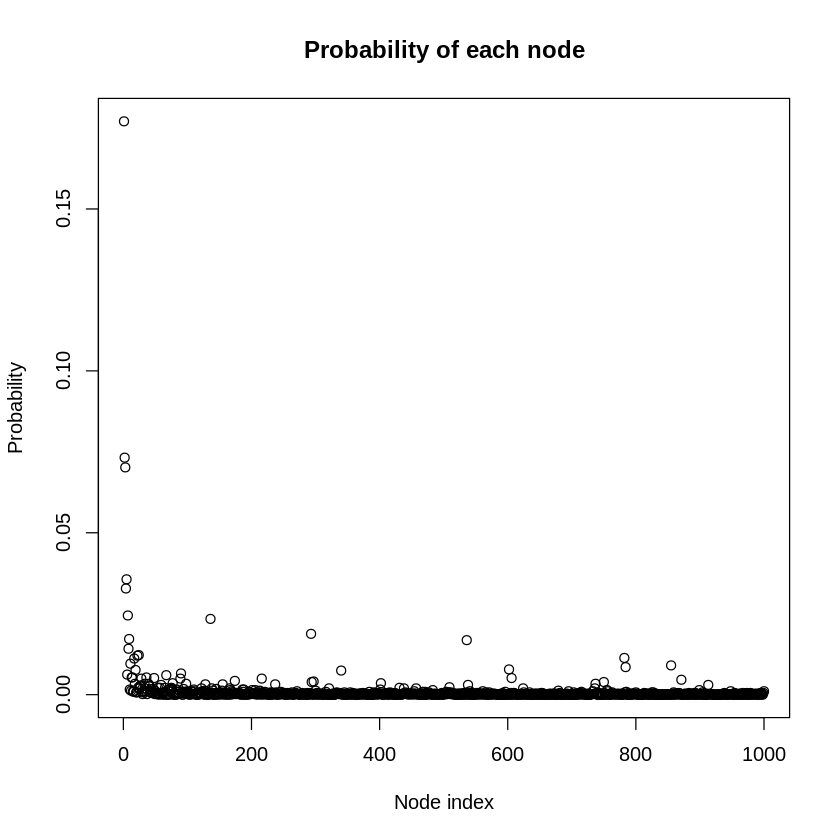

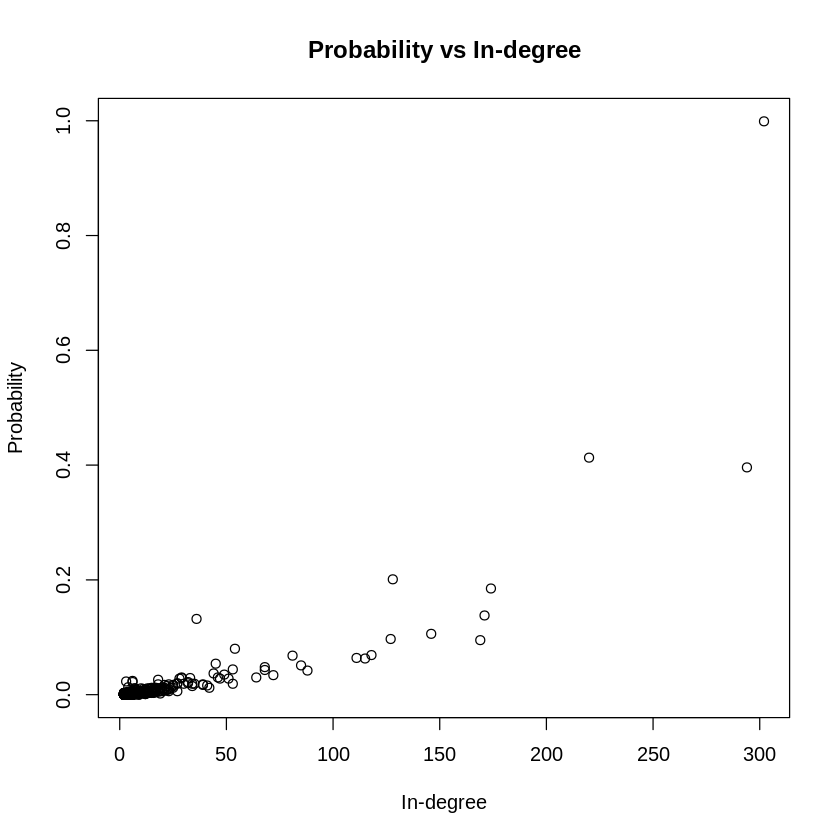

In [17]:
# (a)
n = 1000
g6_1 = barabasi.game(n = n, m = 4, directed = TRUE)
g6_2 = barabasi.game(n = n, m = 4, directed = TRUE)
new_idx = sample(1:n)
while(new_idx[1] == 1){
    new_idx = sample(1:n)
}
g6_3 = permute(g6_2, new_idx)

g6 = add_edges(g6_1, as_edgelist(g6_3))
pr = plot_prob(g6, 50, 1000)


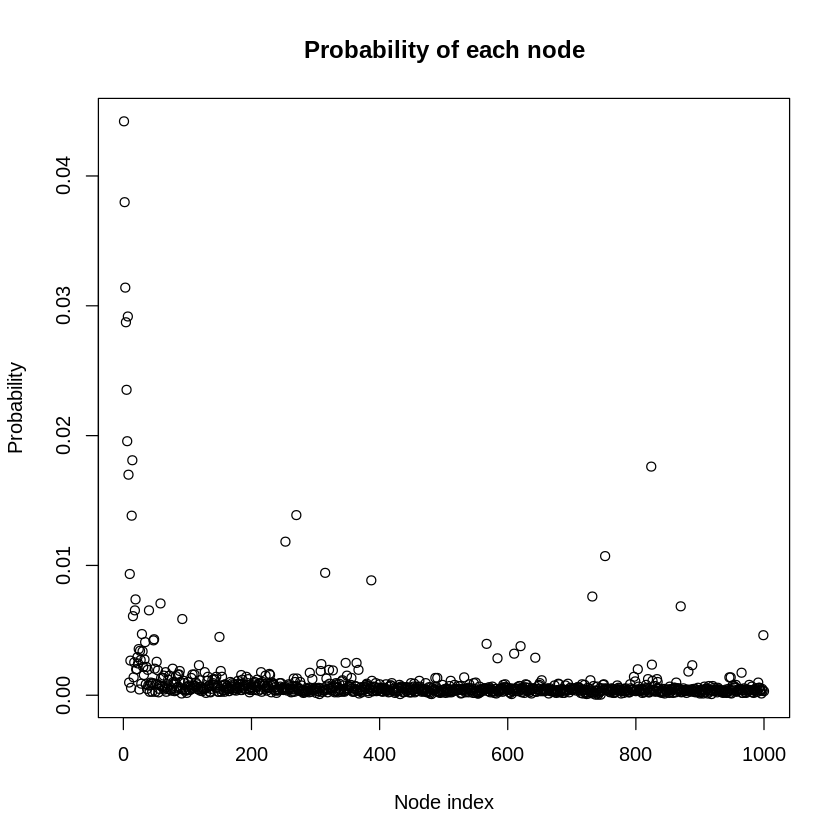

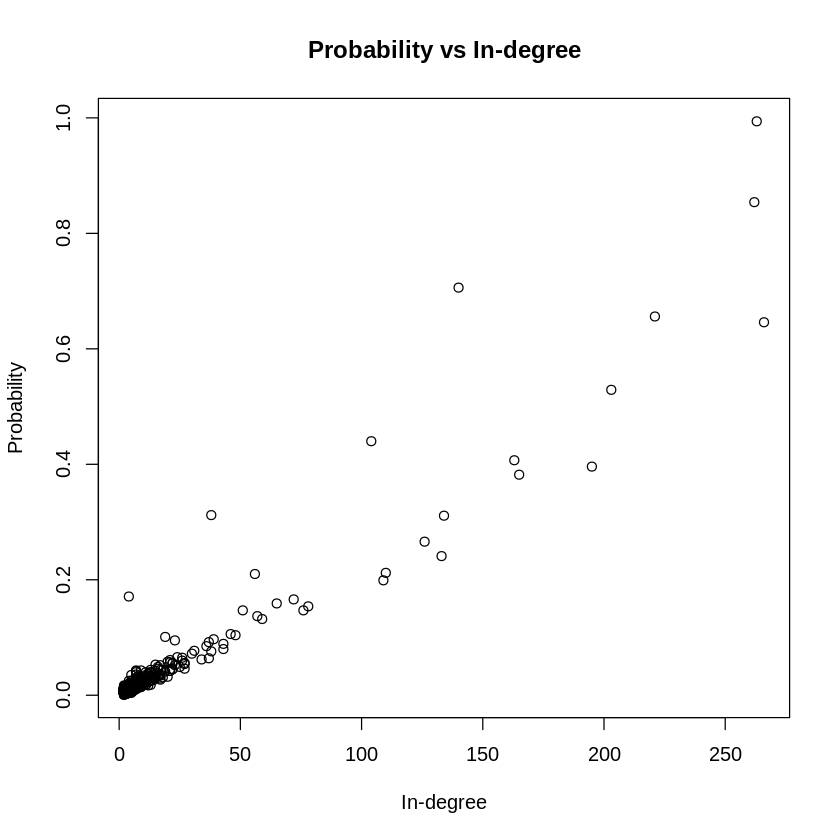

In [13]:
# (b)
pr = plot_prob(g6, 50, 1000, 0.15, rep(1/n, n))

**Q4**

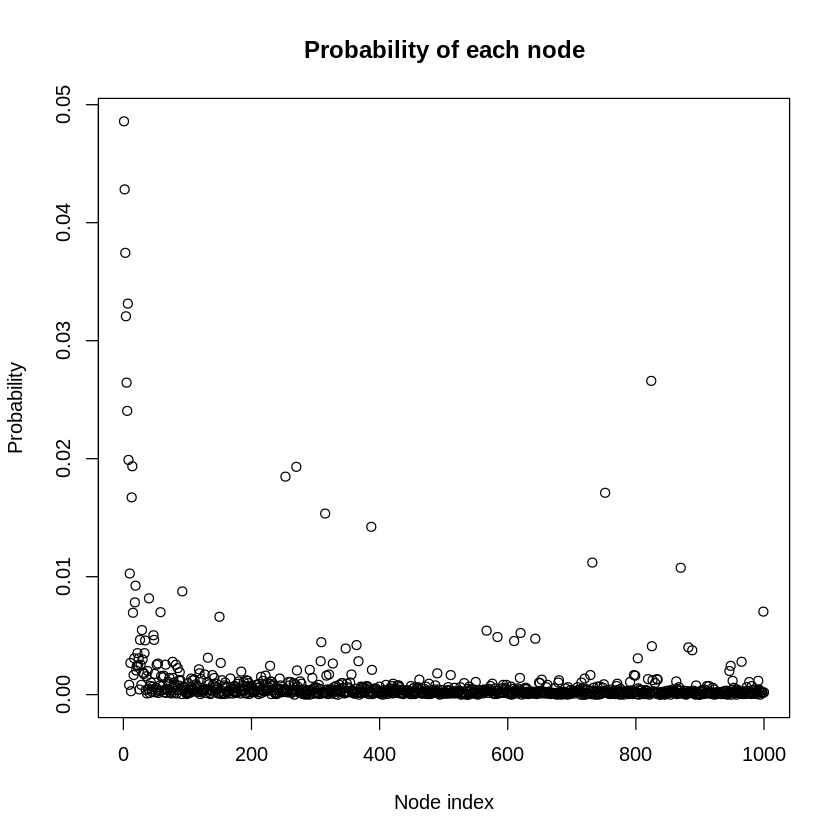

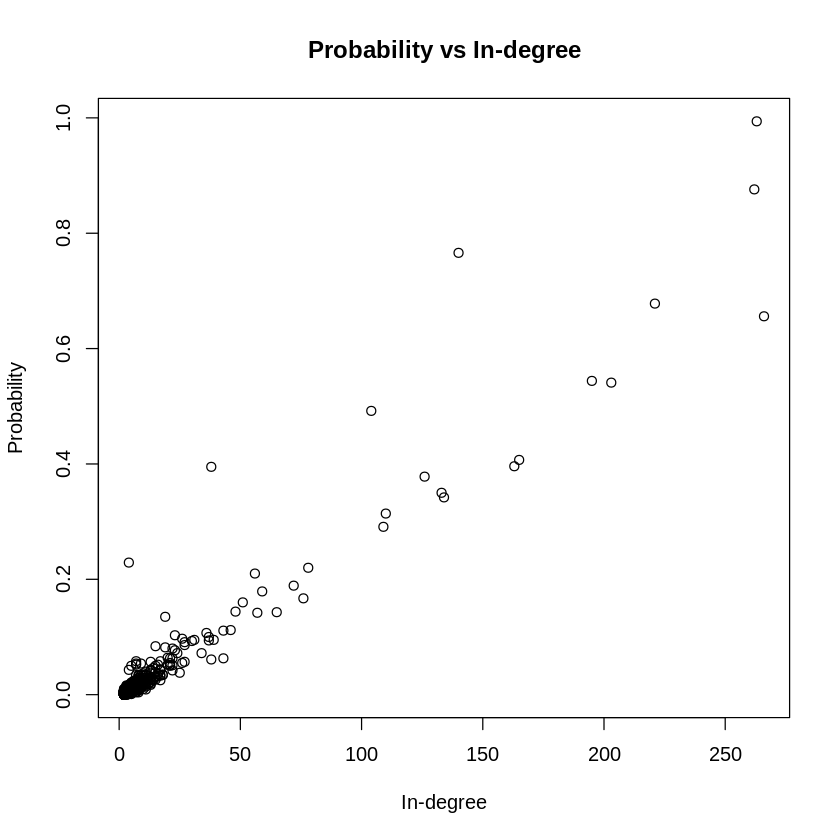

In [14]:
# (a)
new_pr1 = plot_prob(g6, 50, 1000, 0.15, pr)

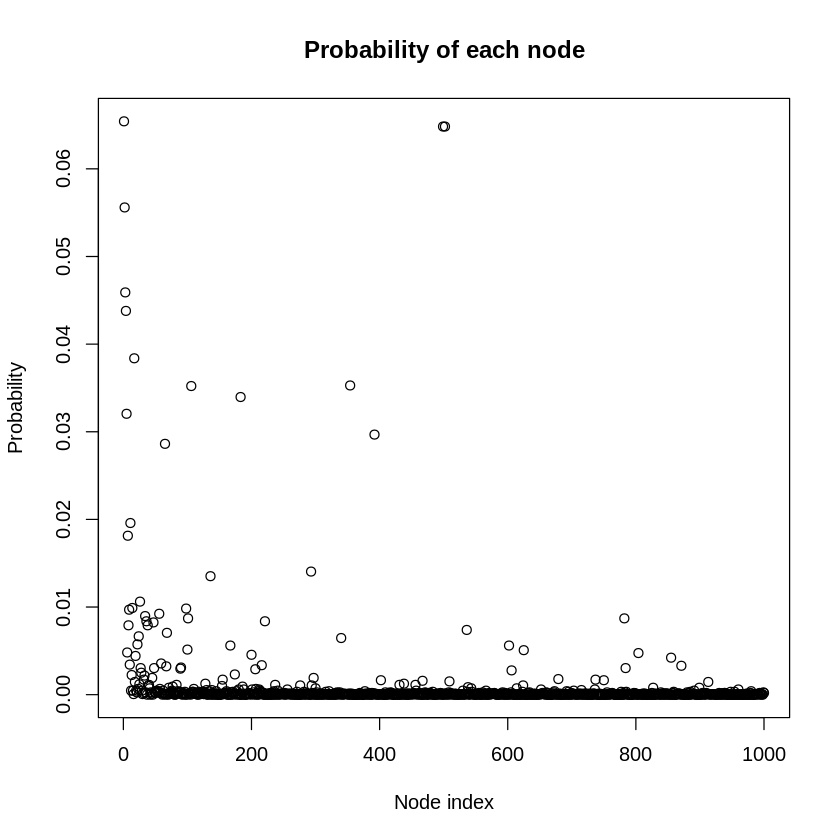

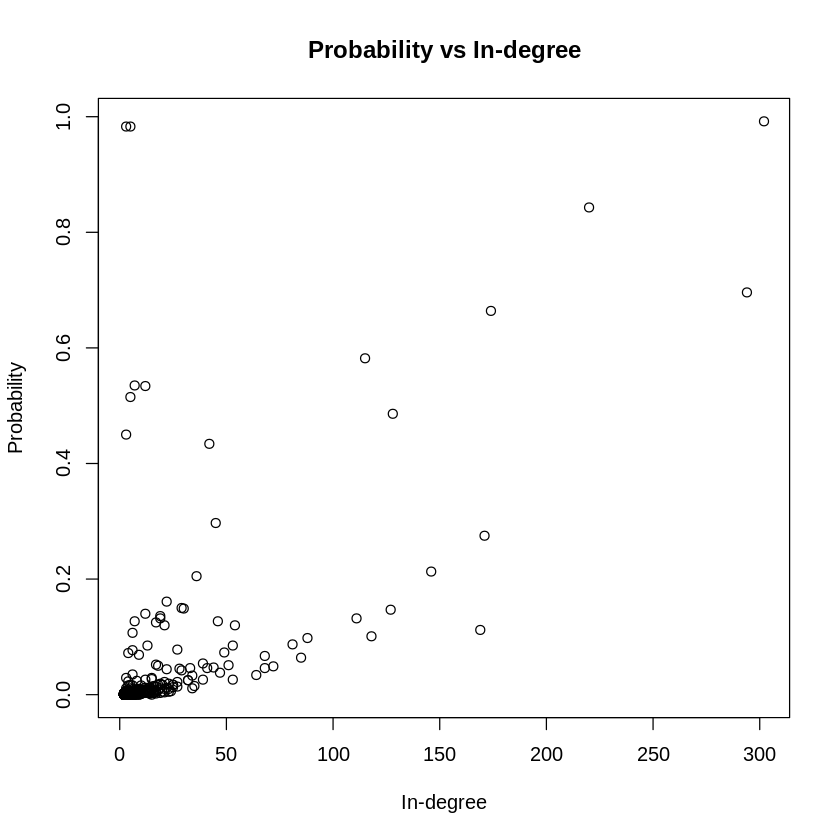

In [18]:
# (b)
pr_order = order(pr)
n1 = pr_order[500]
n2 = pr_order[501]
pmf = array(0, 1000)
pmf[n1] = 0.5
pmf[n2] = 0.5
new_pr2 = plot_prob(g6, 50, 1000, 0.15, pmf)